<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Reto2_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Conexión con mi unidad en Google Drive

import pandas as pd # manejo de Data Frame en Python
pd.set_option('display.max_columns', 50) # Mostrar mas columnas
import numpy as np
# Librería de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Segmentación
from sklearn.cluster import KMeans # K-means
from sklearn.metrics import silhouette_score # Score selección de clúster
from sklearn.preprocessing import StandardScaler # Estandarización

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se carga la base de datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/total_incidentes_transito.csv',
                 encoding='latin-1')
df.dropna()

OBJECTID                                    Shape  radicado  \
0             1   (4713091.969499999, 2248782.755800003)   1740037   
1             2        (4714910.6292, 2244088.547700003)   1756253   
2             3  (4715232.050800002, 2247305.6388000026)   1741056   
3             4        (4716026.328000001, 2254477.3071)   1759316   
4             5  (4718366.126200001, 2248621.4102999996)   1754472   
...         ...                                      ...       ...   
40594     40595   (4714981.318700001, 2254779.946300002)   1743080   
40595     40596   (4712668.976900001, 2249885.013600003)   1774149   
40596     40597   (4718239.037600001, 2251226.429399999)   1758468   
40597     40598  (4716560.627900001, 2248431.7728000022)   1742119   
40598     40599       (4717071.7745, 2251897.4152999986)   1763007   

                     fecha      hora  dia  periodo           clase  \
0      2021-03-03 00:00:00  12:30:00    3     2021       Atropello   
1      2021-07-26 00:00:00  13:00:00   26     2021          Choque   
2      2021-03-02 00:00:00   6:15:00    2     2021          Choque   
3      2021-08-24 00:00:00  22:40:00   24     2021            Otro   
4      2021-07-16 00:00:00   7:40:00   16     2021            Otro   
...                    ...       ...  ...      ...             ...   
40594  2021-03-25 00:00:00  12:30:00   25     2021          Choque   
40595  2021-12-16 00:00:00   4:20:00   16     2021          Choque   
40596  2021-08-13 00:00:00   5:30:00   13     2021       Atropello   
40597  2021-03-20 00:00:00  13:20:00   20     2021     Volcamiento   
40598  2021-09-21 00:00:00  13:30:00   21     2021  Caida Ocupante   

                    direccion               direccion_enc     cbml  \
0             TV 39B CR 74 75  TV  039 B   074  000 00000  Sin inf   
1             CRA 48 CLL 4SUR   CR  048  S 004  000 00000     1422   
2              CR 50 CL 30 28    CR  050   030  000 00000     1012   
3           CR 65 CL 101 101A    CR  065   101  000 00000      509   
4              CL 56 CR 26 28    CL  056   026  000 00000      810   
...                       ...                         ...      ...   
40594            CR 76 CL 101    CR  076   101  000 00000      604   
40595          CLL 45GG 79 48  CL  045 GG  079  000 00000     1112   
40596             CR 36 CL 73    CR  036   073  000 00000      308   
40597        CLL 46 CRA 40 43    CL  046   040  000 00000     1015   
40598  CARRERA 49 CALLE 80 81    CR  049   080  000 00000      410   

                           tipo_geocod    gravedad              barrio  \
0                           Malla vial      HERIDO            Laureles   
1                           Malla vial  SOLO DAÑOS       La Aguacatala   
2                           Malla vial      HERIDO    Perpetuo Socorro   
3                           Malla vial      HERIDO            Girardot   
4      Malla vial aproximada: CL 56-25      HERIDO            El Pinal   
...                                ...         ...                 ...   
40594                       Malla vial      HERIDO            Pedregal   
40595                       Malla vial      HERIDO        El Velódromo   
40596  Malla vial aproximada: CR 36-72      HERIDO   Manrique Oriental   
40597                       Malla vial      HERIDO       Bomboná No. 1   
40598                       Malla vial      HERIDO  Campo Valdés No. 1   

                 comuna         diseno dia_nombre  mes  mes_nombre  \
0      Laureles Estadio  Lote o Predio  MIÉRCOLES    3  MARZO        
1            El Poblado   Interseccion  LUNES        7  JULIO        
2         La Candelaria   Tramo de via  MARTES       3  MARZO        
3              Castilla   Tramo de via  MARTES       8  AGOSTO       
4         Villa Hermosa  Lote o Predio  VIERNES      7  JULIO        
...                 ...            ...        ...  ...         ...   
40594   Doce de Octubre   Interseccion  JUEVES       3  MARZO        
40595  Laureles Estadio   Tramo de 

In [ ]:
#Se eliminan todas aquellas columnas que generan ruido
data= df.drop(labels=['OBJECTID','Shape','radicado','fecha','direccion','dia','direccion_enc','cbml','tipo_geocod','diseno','x_magnamed','y_magnamed','mes','comuna'], axis=1)
data

hora  periodo           clase    gravedad              barrio  \
0      12:30:00     2021       Atropello      HERIDO            Laureles   
1      13:00:00     2021          Choque  SOLO DAÑOS       La Aguacatala   
2       6:15:00     2021          Choque      HERIDO    Perpetuo Socorro   
3      22:40:00     2021            Otro      HERIDO            Girardot   
4       7:40:00     2021            Otro      HERIDO            El Pinal   
...         ...      ...             ...         ...                 ...   
40594  12:30:00     2021          Choque      HERIDO            Pedregal   
40595   4:20:00     2021          Choque      HERIDO        El Velódromo   
40596   5:30:00     2021       Atropello      HERIDO   Manrique Oriental   
40597  13:20:00     2021     Volcamiento      HERIDO       Bomboná No. 1   
40598  13:30:00     2021  Caida Ocupante      HERIDO  Campo Valdés No. 1   

      dia_nombre  mes_nombre   longitud   latitud  
0      MIÉRCOLES  MARZO      -75.593827  6.245137  
1      LUNES      JULIO      -75.577189  6.202779  
2      MARTES     MARZO      -75.574427  6.231878  
3      MARTES     AGOSTO     -75.567569  6.296749  
4      VIERNES    JULIO      -75.546170  6.243911  
...          ...         ...        ...       ...  
40594  JUEVES     MARZO      -75.577024  6.299439  
40595  JUEVES     DICIEMBRE  -75.597697  6.255083  
40596  VIERNES    AGOSTO     -75.547433  6.267457  
40597  SÁBADO     MARZO      -75.562474  6.242117  
40598  MARTES     SEPTIEMBRE -75.558008  6.273472  

[40599 rows x 9 columns]

2. Análisis y Limpieza de los Datos

Se eliminan de la columna 'gravedad' todos aquellos datos que dan como resultado 'SOLO DAÑOS' ya que no son relevantes para este caso. Asimismo, se eliminan de la columna 'clase' todos aquellos datos bajo el nombre 'Incendio' ya que se considera un accidente atípico (visto en la frecuencia de los datos). Y por último, de la columna barrio, se eliminan los datos que no tienen información, nombre o se encuentren vacias.

In [ ]:
data1 = data.loc[(data['gravedad'] != 'SOLO DAÑOS')&(data['clase'] != 'Incendio')&(data['barrio'] != 'Sin inf')&(data['barrio'] != 'Sin Inf') & (data['barrio'] != 'Sin Nombre')&(data['barrio'] != ' ')]
data1

hora  periodo           clase gravedad                      barrio  \
0      12:30:00     2021       Atropello   HERIDO                    Laureles   
2       6:15:00     2021          Choque   HERIDO            Perpetuo Socorro   
3      22:40:00     2021            Otro   HERIDO                    Girardot   
4       7:40:00     2021            Otro   HERIDO                    El Pinal   
6      22:30:00     2021          Choque   HERIDO  Área de Expansión Pajarito   
...         ...      ...             ...      ...                         ...   
40594  12:30:00     2021          Choque   HERIDO                    Pedregal   
40595   4:20:00     2021          Choque   HERIDO                El Velódromo   
40596   5:30:00     2021       Atropello   HERIDO           Manrique Oriental   
40597  13:20:00     2021     Volcamiento   HERIDO               Bomboná No. 1   
40598  13:30:00     2021  Caida Ocupante   HERIDO          Campo Valdés No. 1   

      dia_nombre  mes_nombre   longitud   latitud  
0      MIÉRCOLES  MARZO      -75.593827  6.245137  
2      MARTES     MARZO      -75.574427  6.231878  
3      MARTES     AGOSTO     -75.567569  6.296749  
4      VIERNES    JULIO      -75.546170  6.243911  
6      LUNES      JUNIO      -75.614599  6.277477  
...          ...         ...        ...       ...  
40594  JUEVES     MARZO      -75.577024  6.299439  
40595  JUEVES     DICIEMBRE  -75.597697  6.255083  
40596  VIERNES    AGOSTO     -75.547433  6.267457  
40597  SÁBADO     MARZO      -75.562474  6.242117  
40598  MARTES     SEPTIEMBRE -75.558008  6.273472  

[20329 rows x 9 columns]

3. Se implementa el modelo 'K-Means'

**3.1. Se estandarizan las variables**

In [ ]:
data1_var= data1[["longitud","latitud"]] # Seleccionamos las columnas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1_var)
scaled_features # Transforma a numpy, una matriz

array([[-0.93322138, -0.3902561 ],
       [ 0.05439773, -0.87319651],
       [ 0.40356871,  1.4896487 ],
       ...,
       [ 1.42867441,  0.42271571],
       [ 0.66293151, -0.5002378 ],
       [ 0.89026622,  0.64179657]])

**3.2. Se aplica el Algoritmo**

In [ ]:
kmeans = KMeans(n_clusters=2,  random_state=123) # Definir el algoritmo
kmeans.fit(scaled_features)  # Entrenar el modelo
data1["cluster"] = kmeans.labels_ # Obtener las etiquetas
data1["cluster"] = data1["cluster"].astype(str) # Convertir a categoria

#Se obtienen los centros
centros =  data1.groupby("cluster")[["latitud","longitud"] ].mean()
centros

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-53-605cc3f817ce>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-605cc3f817ce>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



latitud   longitud
cluster                     
0        6.270837 -75.563700
1        6.237909 -75.589619

In [ ]:
fig = px.scatter_mapbox(data1, lat="latitud", lon="longitud", color="cluster")
fig.add_scattermapbox(lat=centros.reset_index()['latitud'], lon=centros.reset_index()['longitud'],marker_size=10,marker_color="black")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**3.3. Se determina el número de clusters**

3.3.1. Método del Codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

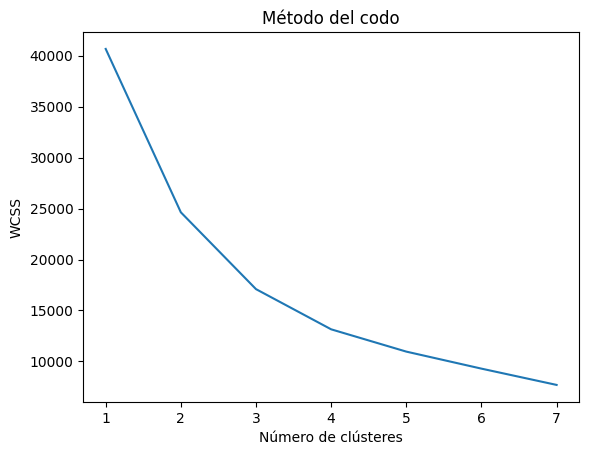

In [ ]:
wcss = [] # valores de WCSS
lista_num_cluster = range(1, 8) # Número de clústeres
# Por cada número de clústeres
for i in lista_num_cluster:
    kmeans = KMeans(n_clusters=i, random_state=123) # Definir el modelo
    kmeans.fit(scaled_features) # entrenar el modelo
    value_wcss= kmeans.inertia_ # extraer el WCSS del modelo
    wcss.append(value_wcss) # Añadir a la lista
# Gráficar resultados
plt.plot(lista_num_cluster, wcss)
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()

Después de ejecutado el método y con base a la gráfica, se podría decir que el número de clusters ideal está entre 3 y 4.

3.3.2. Puntuación de Silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

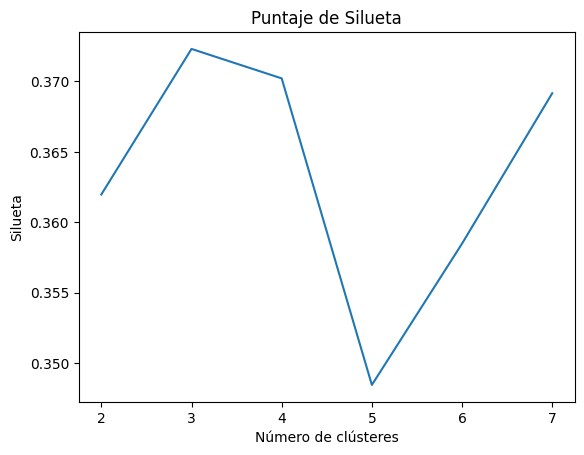

In [ ]:
silueta = [] # valores de puntuación de silueta
lista_num_cluster = range(2, 8) # Número de clústeres
# Por cada número de clústeres
for i in lista_num_cluster:
    kmeans = KMeans(n_clusters=i, random_state=123) # Definir el modelo
    kmeans.fit(scaled_features) # entrenar el modelo
    score_slueta= silhouette_score(scaled_features,  kmeans.labels_)  # Calcular el score
    silueta.append(score_slueta) # Añadir a la lista
# Gráficar resultados
plt.plot(lista_num_cluster, silueta)
plt.title('Puntaje de Silueta')
plt.xlabel('Número de clústeres')
plt.ylabel('Silueta')
plt.show()

Luego de ejecutado el modelo y teniendo en cuenta la gráfica, según este método el número de clusters ideal estaría sería 3, aunque si se utilizan 4 según este método también se obtendría un buen resultado.
De esta misma forma, se podría decir que según este método, si se utilizan 7 clusters también me daría un buen resultado (otro valor cercano al 1).

4. Modelo con el Número de Clusters elegidos

Después de la ejecución de los dos métodos para saber cuantos serían los clusters indicados para la elaboración del modelo, se decide utilizar 3 clusters, ya que es el número que se repite en ambos métodos.

In [ ]:
kmeans = KMeans(n_clusters=3,  random_state=123) # Definir el algoritmo
kmeans.fit(scaled_features)  # Entrenar el modelo
data1["cluster"] = kmeans.labels_ # Obtener las etiquetas
data1["cluster"] = data1["cluster"].astype(str) # Convertir a categoria

#Se obtienen los centros
centros =  data1.groupby("cluster")[["latitud","longitud"] ].mean()
centros

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-59-c115db94ae1c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-c115db94ae1c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



latitud   longitud
cluster                     
0        6.235150 -75.569694
1        6.281806 -75.565094
2        6.251036 -75.603519

In [ ]:
fig = px.scatter_mapbox(data1, lat="latitud", lon="longitud", color="cluster")
fig.add_scattermapbox(lat=centros.reset_index()['latitud'], lon=centros.reset_index()['longitud'],marker_size=10,marker_color="black")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
data1["cluster"].value_counts()

cluster
0    8338
1    7486
2    4505
Name: count, dtype: int64

**5. Análisis de Resultados**

Finalmente, se puede concluir que para este problema lo ideal sería utilizar
3 clusters, pues es el que se repite en ambos métodos, demonstrando así que es el que nos permitirá obtener mejores resultados.

Ahora, la limpieza de datos fue relevante para abordar este problema, ya que se logró eliminar algunos de los datos que estaban dispersos en el mapa de clase, ayudando a eliminar posibles datos atípicos. No obstante, a la hora de ejecutar el modelo, a pesar de que este nos da tres clusters los cuales se ven bien distribuidos, solo viendo la gráfica, todavía hay puntos que podrían pertenecer a otro cluster. De igual forma, sí creo que los cluster en este caso se ven más precisos a diferencia del mapa de la clase, pero como dicho anteriormente podrían ser mejor.
Por otro lado, la diferencia más grande que encuentro en el mapa de los dos modelos, vendría siendo que en ambos se logra apreciar una distribución de clusters distinta. Puesto que en el mapa de clase donde se concentra la mayoría de los datos, el modelo lo dividió solo en dos clusters (rojo y azul), teniendo un tercero con los datos más alejados (verde). Mientras que en este caso, donde se encuentra la mayor cantidad de datos es donde se dividen los tres clusters.
